In [ ]:
import google.colab
google.colab.drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.datasets import cifar10


In [ ]:
data = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [ ]:
print(data[0][0].shape)
print(data[0][1].shape)
print(data[1][0].shape)
print(data[1][1].shape)


(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
(x_train, y_train), (x_test, y_test) = data

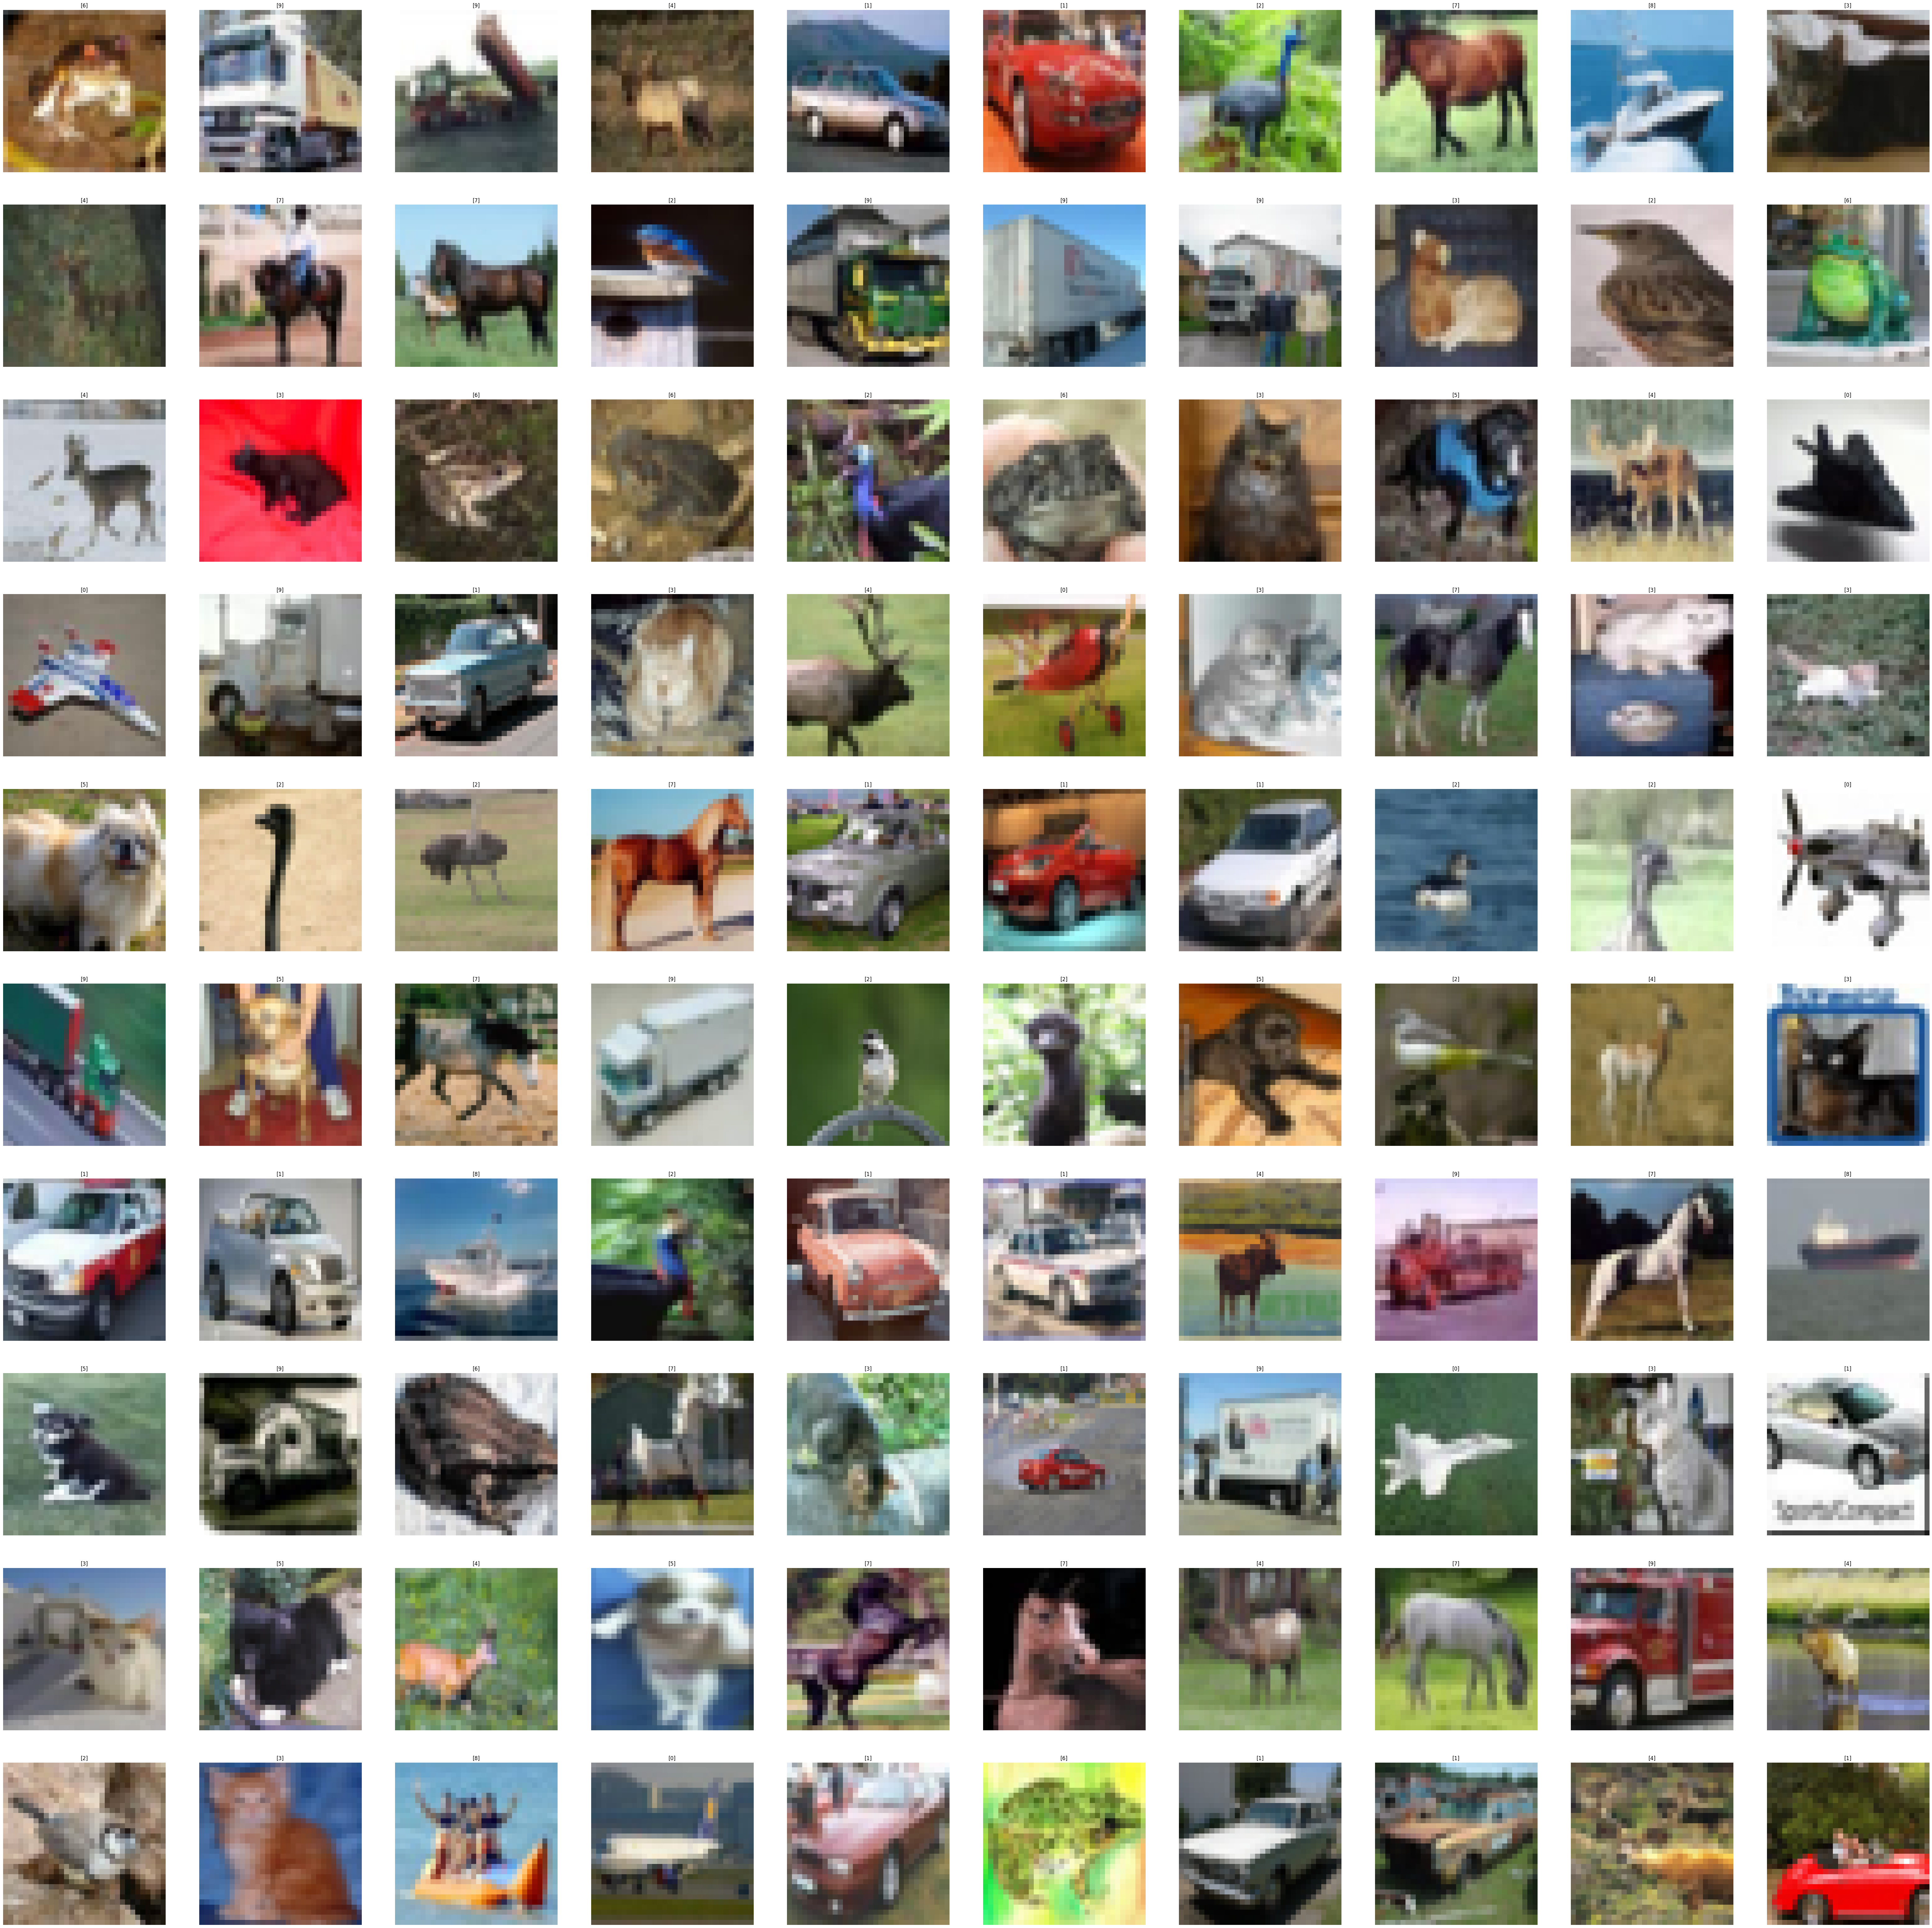

In [ ]:
fig, ax = plt.subplots(10, 10, figsize= (80, 80))
for i in range(10):
  for j in range(10):
    ax[i][j].imshow(x_train[i*10+j])
    ax[i][j].set_title(y_train[i*10+j])
    ax[i][j].axis('off')
plt.show()

In [ ]:
# working on x

# split
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [ ]:
#normalisation
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_val = x_val.astype('float32')/255


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
# reshaping
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_val = x_val.reshape(x_val.shape[0], 32, 32, 3)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_val = to_categorical(y_val, 10)

In [ ]:
#Building the model
from keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
# model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=0, mode='auto')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])




In [ ]:
# fitting the model

history = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val), callbacks= [early])

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.3096 - loss: 1.8881 - val_accuracy: 0.5320 - val_loss: 1.3425
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5205 - loss: 1.3249 - val_accuracy: 0.6128 - val_loss: 1.1453
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5886 - loss: 1.1569 - val_accuracy: 0.6508 - val_loss: 0.9971
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6235 - loss: 1.0599 - val_accuracy: 0.6754 - val_loss: 0.9499
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6523 - loss: 0.9851 - val_accuracy: 0.6924 - val_loss: 0.9052
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6744 - loss: 0.9277 - val_accuracy: 0.6948 - val_loss: 0.8869
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6931 - loss: 0.8719 - val_accuracy: 0.7064 - val_loss: 0.8470
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7043 - loss: 0.8428 - val_accuracy: 0

In [ ]:
# saving the model
model.save('/content/drive/MyDrive/cifar10_model.h5')


In [ ]:
print('hello')

hello


In [ ]:
# testing the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7355502843856812
Test accuracy: 0.7598000168800354


In [ ]:
from sklearn.metrics import confusion_matrix


y_pred = model.predict(x_test)
y_p = y_pred.argmax(1)

confusion_matrix(y_test,y_p)
# print("Confusion Matri\n", confusion_matrix(y_test,y_p))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


AttributeError: 'numpy.ndarray' object has no attribute 'to_categorical'

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


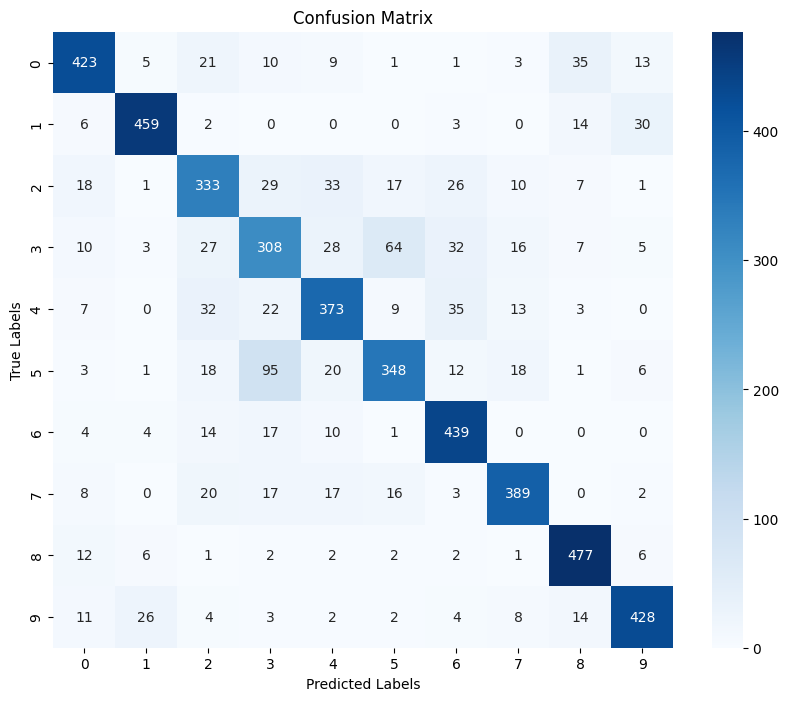

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# from sklearn.metrics import confusion_matrix
# import tensorflow as tf

# y_pred = model.predict(x_test)
# y_p = y_pred.argmax(1)
# # Convert class labels to one-hot encoded vectors using tf.keras.utils.to_categorical
# y_p = tf.keras.utils.to_categorical(y_p, num_classes=10)

# confusion_matrix(y_test,y_p.argmax(axis=1)) # Convert One hot encoded data to class labels
# # print("Confusion Matri\n", confusion_matrix(y_test,y_p))

In [ ]:
model.predict(x_test)


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[6.6371583e-03, 6.8787245e-05, 9.0746535e-03, ..., 1.9015720e-01,
        3.9284878e-05, 6.2589254e-04],
       [1.2497505e-04, 2.3735440e-06, 1.0212241e-01, ..., 1.3773758e-03,
        3.1569314e-08, 2.5953554e-08],
       [2.9333839e-01, 2.6882759e-03, 1.4580746e-02, ..., 2.3136575e-02,
        1.8586646e-01, 4.4827232e-01],
       ...,
       [1.5928730e-08, 9.9987757e-01, 6.3365513e-10, ..., 3.4097423e-11,
        2.2573613e-05, 9.9840530e-05],
       [2.4642484e-08, 1.9035970e-10, 5.4907165e-03, ..., 4.5883395e-03,
        2.1603272e-10, 5.6946603e-09],
       [5.5633602e-05, 1.3050797e-02, 6.7120536e-06, ..., 2.0288805e-06,
        3.4282497e-08, 9.8687679e-01]], dtype=float32)

In [ ]:
#Building the model
from keras.callbacks import ModelCheckpoint, EarlyStopping

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(560, activation='relu'))
model.add(Dense(560, activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(10, activation='softmax'))
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=0, mode='auto')
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])




In [ ]:
# fitting the model

history = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_val, y_val), callbacks= [early])

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.2956 - loss: 1.8904 - val_accuracy: 0.5238 - val_loss: 1.3051
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5583 - loss: 1.2293 - val_accuracy: 0.6474 - val_loss: 0.9926
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.6555 - loss: 0.9718 - val_accuracy: 0.6956 - val_loss: 0.8534
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7178 - loss: 0.8035 - val_accuracy: 0.7384 - val_loss: 0.7560
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7669 - loss: 0.6753 - val_accuracy: 0.7460 - val_loss: 0.7246
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7909 - loss: 0.5922 - val_accuracy: 0.7516 - val_loss: 0.7269
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8180 - loss: 0.5182 - val_accuracy: 0.7662 - val_loss: 0.7089
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8452 - loss: 0.4429 - val_acc

In [ ]:
# testing the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7402585744857788
Test accuracy: 0.7459999918937683
